In [1]:
import pandas as pd

# Load the provided CSV file to inspect its structure
file_path = "/Users/sophiesuo/Downloads/COVID_US_cases.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,date,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-13,0,0,0,0,0,0,0,0
1,2020-01-14,0,0,0,0,0,0,0,0
2,2020-01-15,0,0,0,0,0,0,0,0
3,2020-01-16,0,0,0,0,0,0,0,0
4,2020-01-17,0,0,0,0,0,0,0,0


NameError: name 'mdates' is not defined

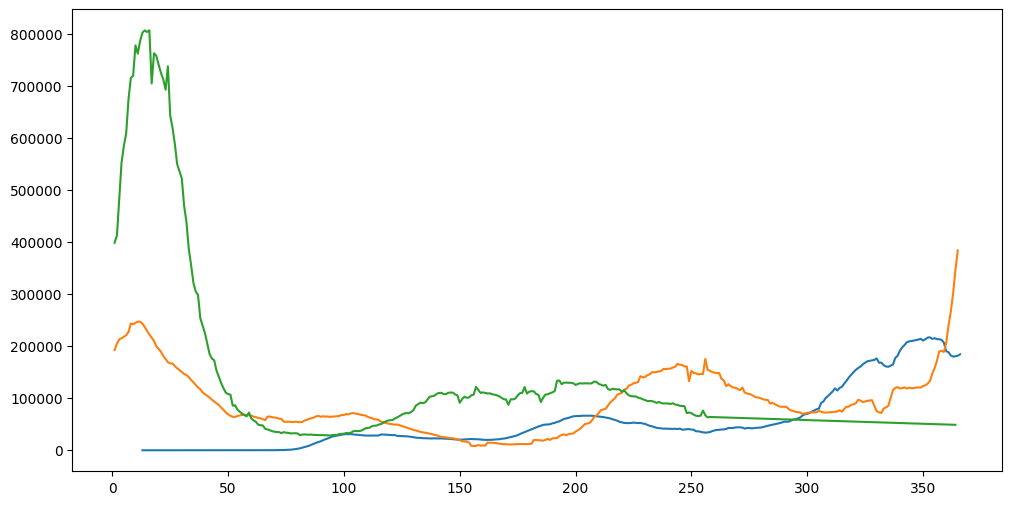

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["season"] = df["date"].dt.month % 12 // 3  # Map months to seasons

# Group data by date to get daily cases
df_daily = df[["date", "new_confirmed"]].copy()
df_daily.set_index("date", inplace=True)

# Create a rolling 7-day average for smoothness
df_daily["7_day_avg"] = df_daily["new_confirmed"].rolling(window=7, min_periods=1).mean()

# Create a grouped dataframe for seasonal visualization
df_seasonal = df.groupby(["year", "season"])["new_confirmed"].sum().reset_index()

# Create a dataframe for monthly case heatmap
df_monthly = df.groupby(["year", "month"])["new_confirmed"].sum().unstack()

# Generate the three visualizations

## 1. Layered Line Chart with Highlighted Peaks
plt.figure(figsize=(12, 6))
for year in df["year"].unique():
    subset = df_daily[df_daily.index.year == year]
    plt.plot(subset.index.dayofyear, subset["7_day_avg"], label=str(year))

# Modify x-axis labels to display months instead of day numbers
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks at the start of each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))  # Format as month abbreviations

plt.xlabel("Month")
plt.ylabel("7-day Average Cases")
plt.title("COVID-19 Trends in the U.S. by Year")
plt.legend(title="Year")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


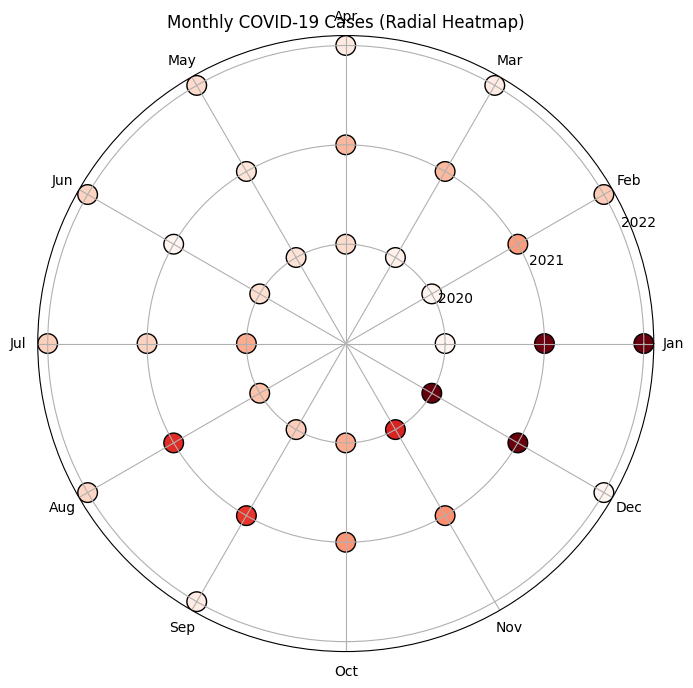

In [7]:
## 2. Radial Heatmap with Gridlines & Peak Labels
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
theta = np.linspace(0, 2 * np.pi, 12, endpoint=False)  # 12 months mapped to angles

for i, year in enumerate(df_monthly.index):
    r = np.full(12, i + 1)  # Radial position for each year
    c = df_monthly.loc[year]  # Cases per month
    ax.scatter(theta, r, c=c, cmap="Reds", edgecolors="black", s=200)

ax.set_xticks(theta)
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax.set_yticks(range(1, len(df_monthly.index) + 1))
ax.set_yticklabels(df_monthly.index)
ax.set_title("Monthly COVID-19 Cases (Radial Heatmap)")
plt.show()

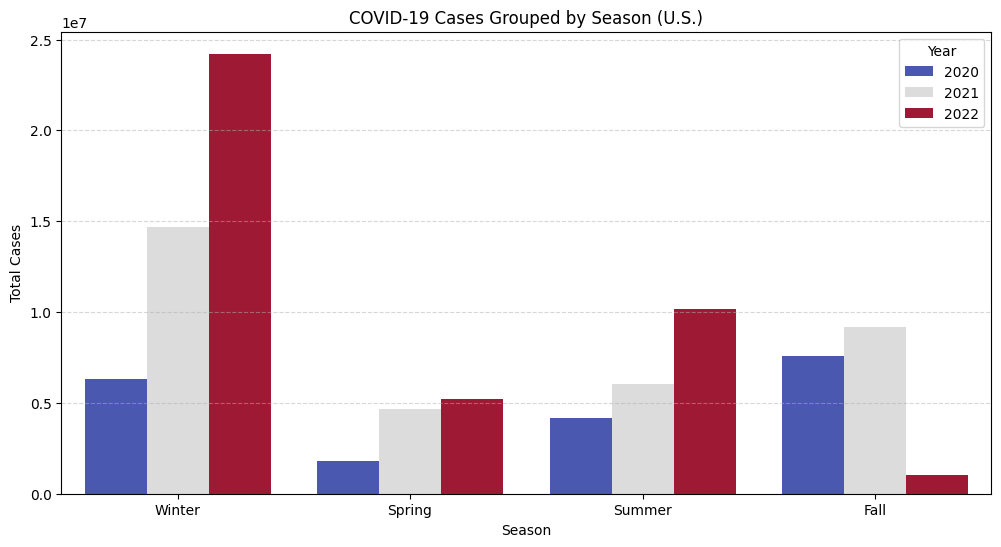

In [8]:
## 3. Bar Chart with Seasonal Grouping & Context Annotations
plt.figure(figsize=(12, 6))
sns.barplot(x=df_seasonal["season"].map({0: "Winter", 1: "Spring", 2: "Summer", 3: "Fall"}), 
            y=df_seasonal["new_confirmed"], 
            hue=df_seasonal["year"], palette="coolwarm")

plt.xlabel("Season")
plt.ylabel("Total Cases")
plt.title("COVID-19 Cases Grouped by Season (U.S.)")
plt.legend(title="Year")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

<Figure size 1200x800 with 0 Axes>

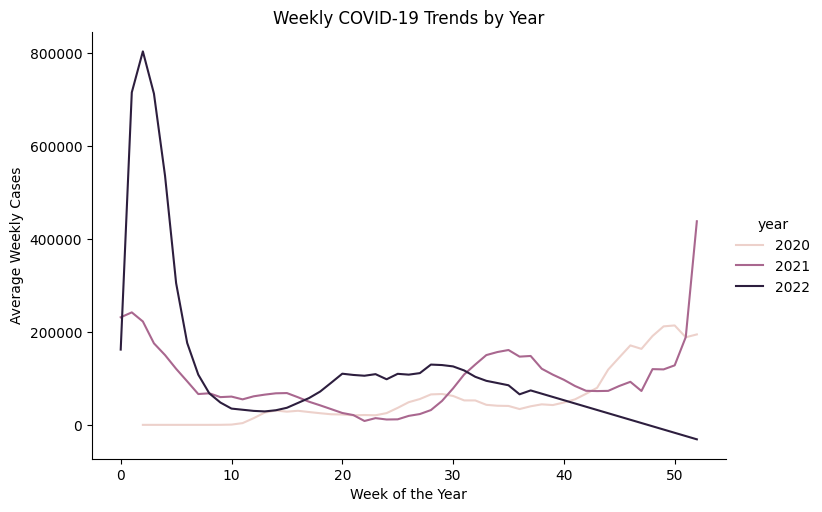

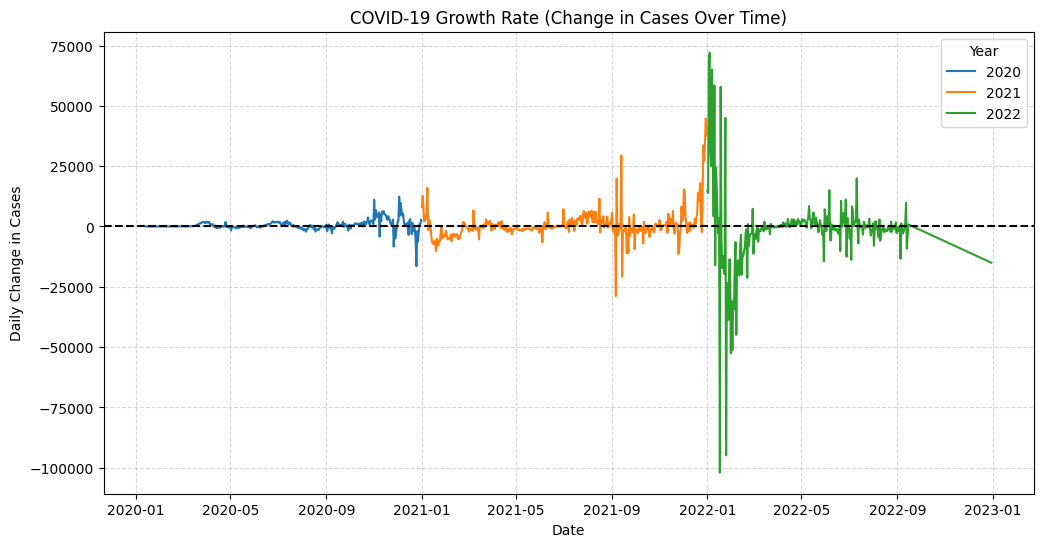

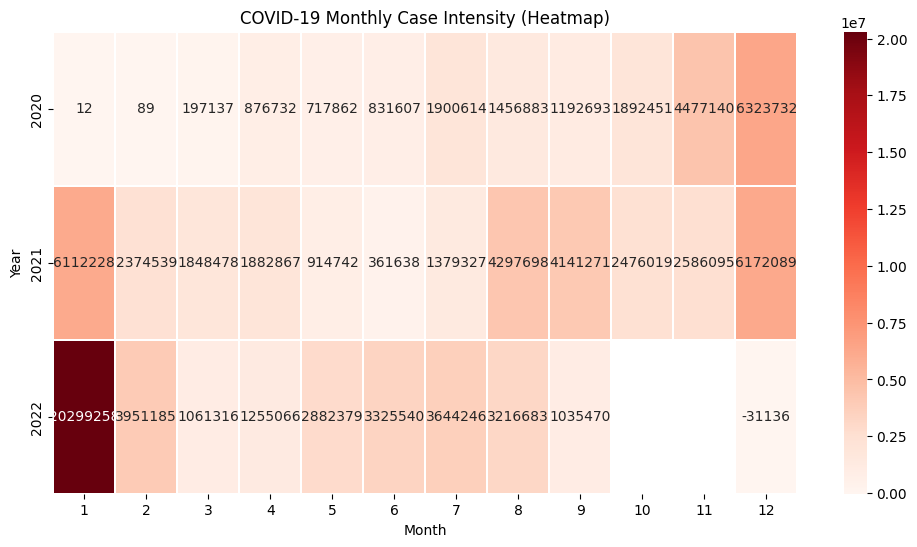

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Weekly Trend Comparison (Faceted Line Chart)
plt.figure(figsize=(12, 8))
df["week"] = df["date"].dt.strftime('%U').astype(int)  # Extract week of the year
df_weekly = df.groupby(["year", "week"])["new_confirmed"].mean().reset_index()

# Faceted line plot by year
sns.relplot(data=df_weekly, x="week", y="new_confirmed", hue="year", kind="line", height=5, aspect=1.5)
plt.xlabel("Week of the Year")
plt.ylabel("Average Weekly Cases")
plt.title("Weekly COVID-19 Trends by Year")
plt.show()


# 2. Case Growth Rate (Derivative Plot)
plt.figure(figsize=(12, 6))
df_daily["growth_rate"] = df_daily["7_day_avg"].diff()  # Calculate first derivative

# Plot growth rate
for year in df["year"].unique():
    subset = df_daily[df_daily.index.year == year]
    plt.plot(subset.index, subset["growth_rate"], label=str(year))

plt.xlabel("Date")
plt.ylabel("Daily Change in Cases")
plt.title("COVID-19 Growth Rate (Change in Cases Over Time)")
plt.axhline(0, color="black", linestyle="--")  # Reference line at zero
plt.legend(title="Year")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


# 3. Heatmap of Case Intensity Over Time (Year-Month Grid)
df_heatmap = df.groupby(["year", "month"])["new_confirmed"].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap, cmap="Reds", linewidths=0.1, linecolor="white", annot=True, fmt=".0f")

plt.xlabel("Month")
plt.ylabel("Year")
plt.title("COVID-19 Monthly Case Intensity (Heatmap)")
plt.show()


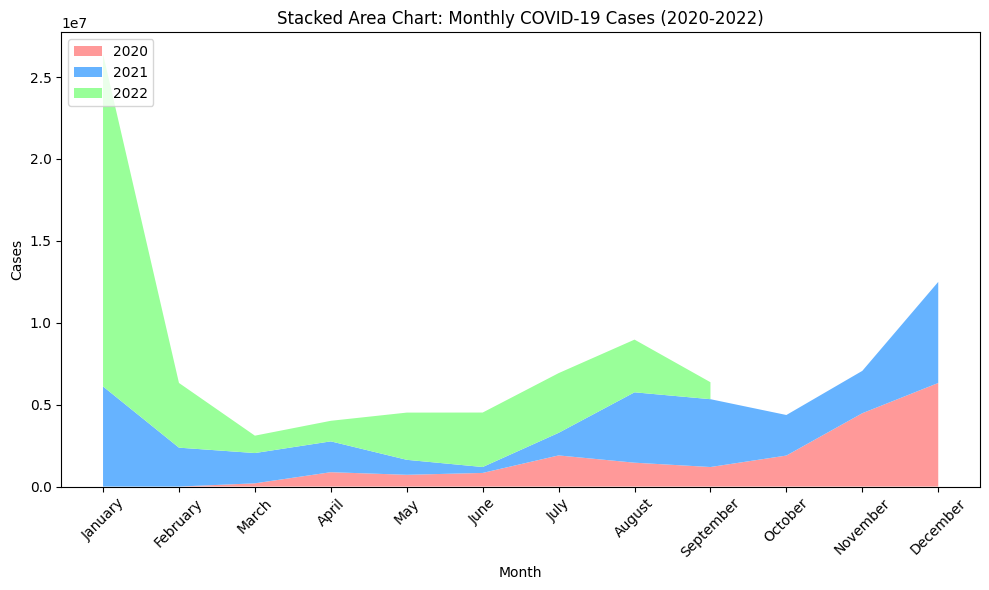

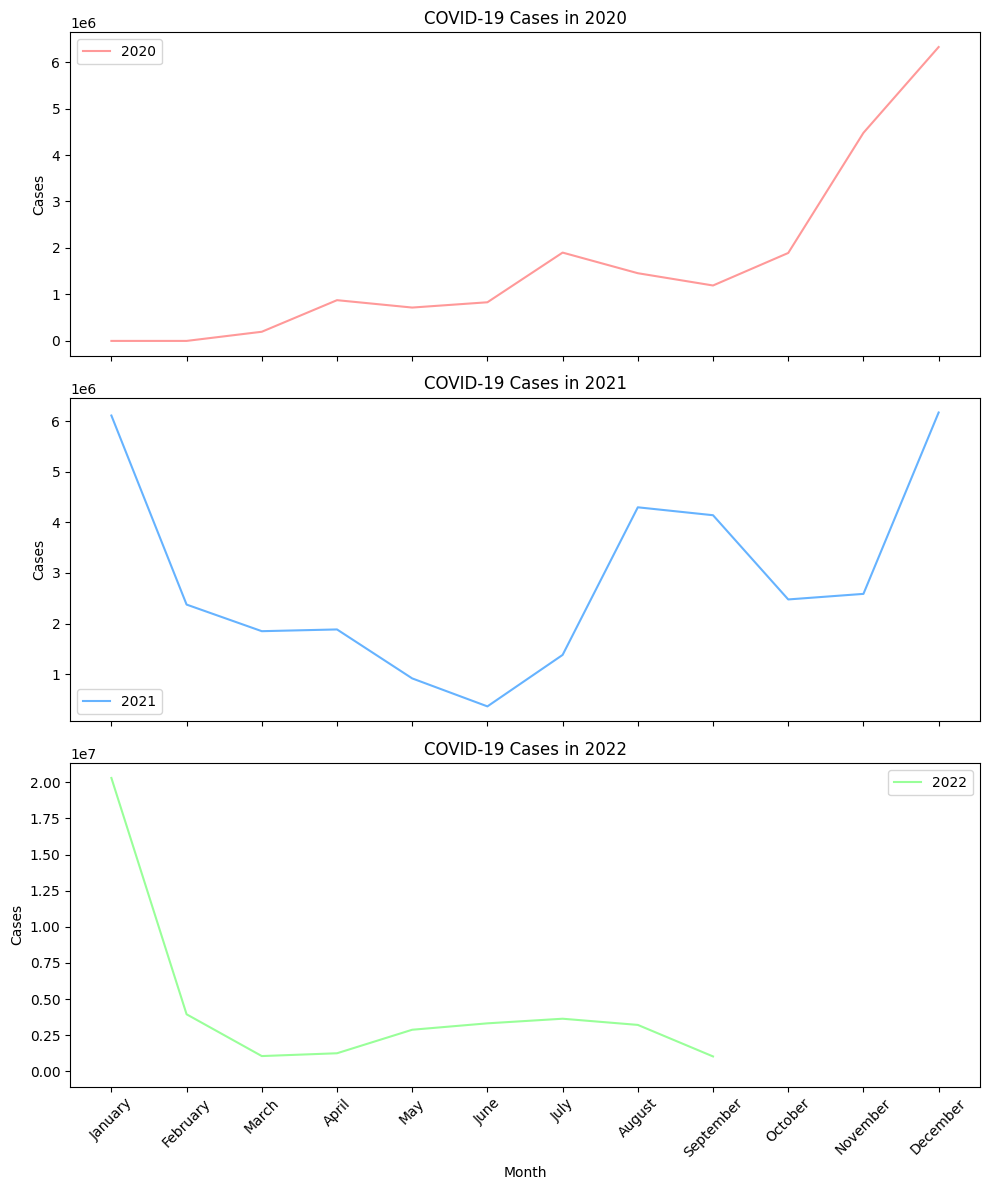

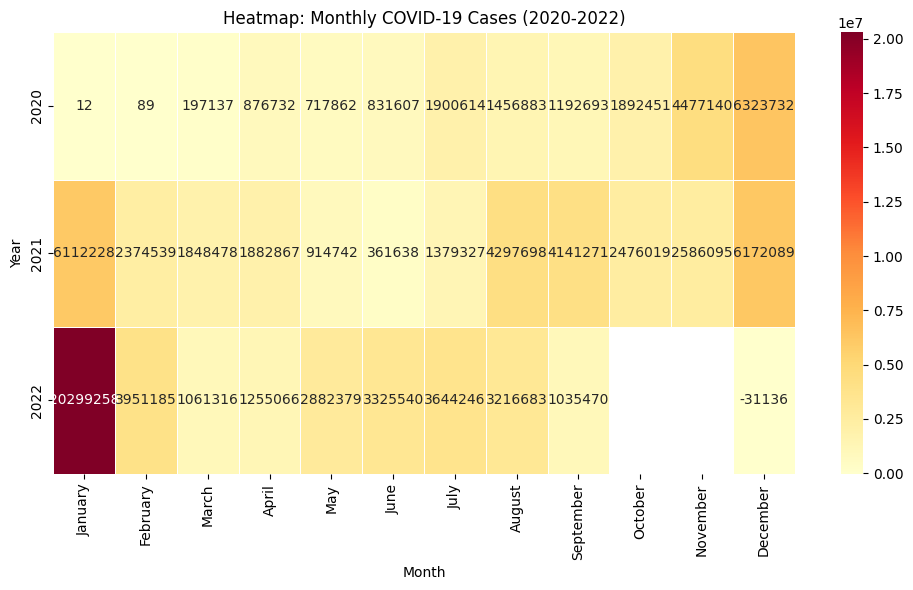

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/Users/sophiesuo/Downloads/COVID_US_cases.csv")

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()

# Aggregate data by month and year
monthly_data = df.groupby(['year', 'month']).agg({'new_confirmed': 'sum'}).reset_index()

# Pivot for heatmap and stacked area chart
pivot_data = monthly_data.pivot(index='month', columns='year', values='new_confirmed')

# Reorder months for proper plotting
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
pivot_data = pivot_data.reindex(month_order)

# Visualization 1: Stacked Area Chart
plt.figure(figsize=(10, 6))
plt.stackplot(
    range(len(pivot_data)),  # X-axis (months)
    pivot_data[2020], pivot_data[2021], pivot_data[2022],
    labels=['2020', '2021', '2022'],
    colors=['#ff9999', '#66b3ff', '#99ff99']
)
plt.title('Stacked Area Chart: Monthly COVID-19 Cases (2020-2022)')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.xticks(range(len(pivot_data)), pivot_data.index, rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Visualization 2: Small Multiples Line Charts
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
for i, year in enumerate([2020, 2021, 2022]):
    axes[i].plot(pivot_data.index, pivot_data[year], label=f'{year}', color=['#ff9999', '#66b3ff', '#99ff99'][i])
    axes[i].set_title(f'COVID-19 Cases in {year}')
    axes[i].set_ylabel('Cases')
    axes[i].legend()
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 3: Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data.T, cmap='YlOrRd', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Heatmap: Monthly COVID-19 Cases (2020-2022)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

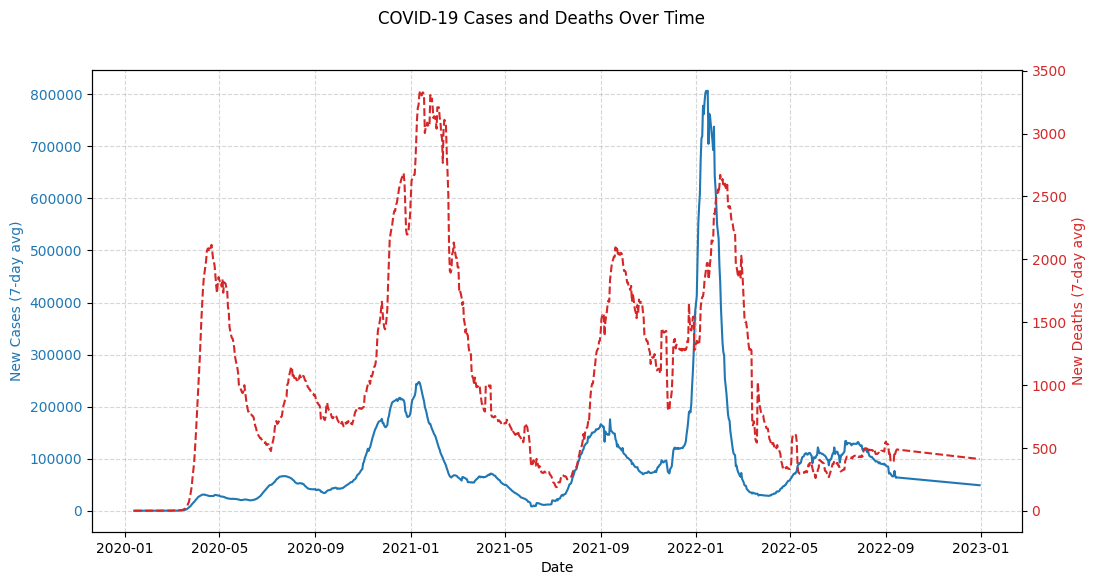

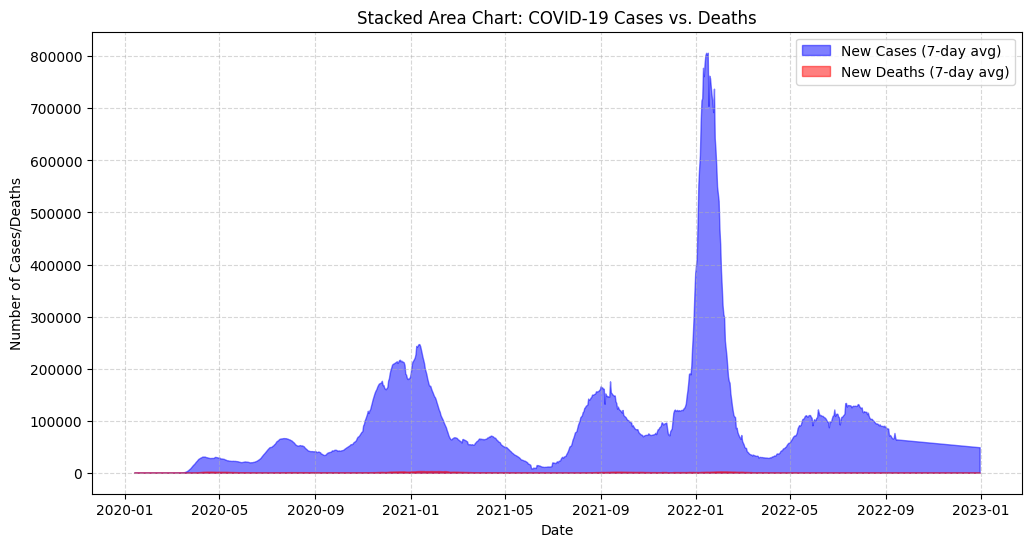

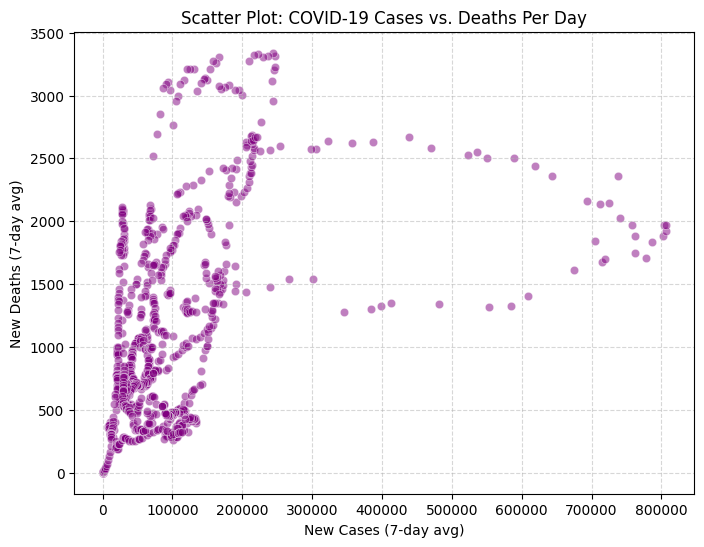

In [11]:
# Load the dataset again
file_path = "/Users/sophiesuo/Downloads/COVID_US_cases.csv"
df = pd.read_csv(file_path)

# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# Group data by date and create a rolling 7-day average for smoothing
df_daily = df[["date", "new_confirmed", "new_deceased"]].copy()
df_daily.set_index("date", inplace=True)
df_daily["cases_7day_avg"] = df_daily["new_confirmed"].rolling(window=7, min_periods=1).mean()
df_daily["deaths_7day_avg"] = df_daily["new_deceased"].rolling(window=7, min_periods=1).mean()

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dual-Axis Line Chart (Cases & Deaths Over Time)
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel("Date")
ax1.set_ylabel("New Cases (7-day avg)", color="tab:blue")
ax1.plot(df_daily.index, df_daily["cases_7day_avg"], color="tab:blue", label="New Cases (7-day avg)")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.set_ylabel("New Deaths (7-day avg)", color="tab:red")
ax2.plot(df_daily.index, df_daily["deaths_7day_avg"], color="tab:red", linestyle="dashed", label="New Deaths (7-day avg)")
ax2.tick_params(axis="y", labelcolor="tab:red")

fig.suptitle("COVID-19 Cases and Deaths Over Time")
ax1.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 2. Stacked Area Chart (Cases vs. Deaths Proportion)
plt.figure(figsize=(12, 6))
plt.fill_between(df_daily.index, df_daily["cases_7day_avg"], alpha=0.5, color="blue", label="New Cases (7-day avg)")
plt.fill_between(df_daily.index, df_daily["deaths_7day_avg"], alpha=0.5, color="red", label="New Deaths (7-day avg)")
plt.xlabel("Date")
plt.ylabel("Number of Cases/Deaths")
plt.title("Stacked Area Chart: COVID-19 Cases vs. Deaths")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 3. Case-Fatality Scatter Plot (Deaths vs. Cases Per Day)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_daily["cases_7day_avg"], y=df_daily["deaths_7day_avg"], alpha=0.5, color="purple")
plt.xlabel("New Cases (7-day avg)")
plt.ylabel("New Deaths (7-day avg)")
plt.title("Scatter Plot: COVID-19 Cases vs. Deaths Per Day")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


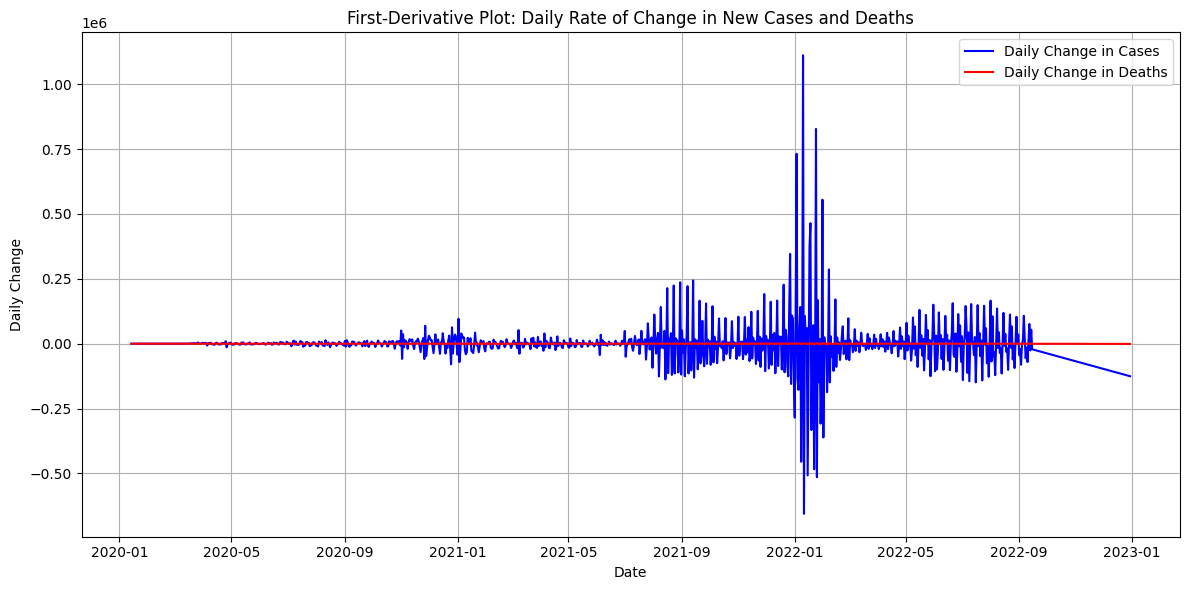

In [13]:
# Calculate daily rate of change (first derivative)
df['daily_change_cases'] = df['new_confirmed'].diff()
df['daily_change_deaths'] = df['new_deceased'].diff()

# Plot the first-derivative plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['daily_change_cases'], label='Daily Change in Cases', color='blue')
plt.plot(df['date'], df['daily_change_deaths'], label='Daily Change in Deaths', color='red')
plt.title('First-Derivative Plot: Daily Rate of Change in New Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Daily Change')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

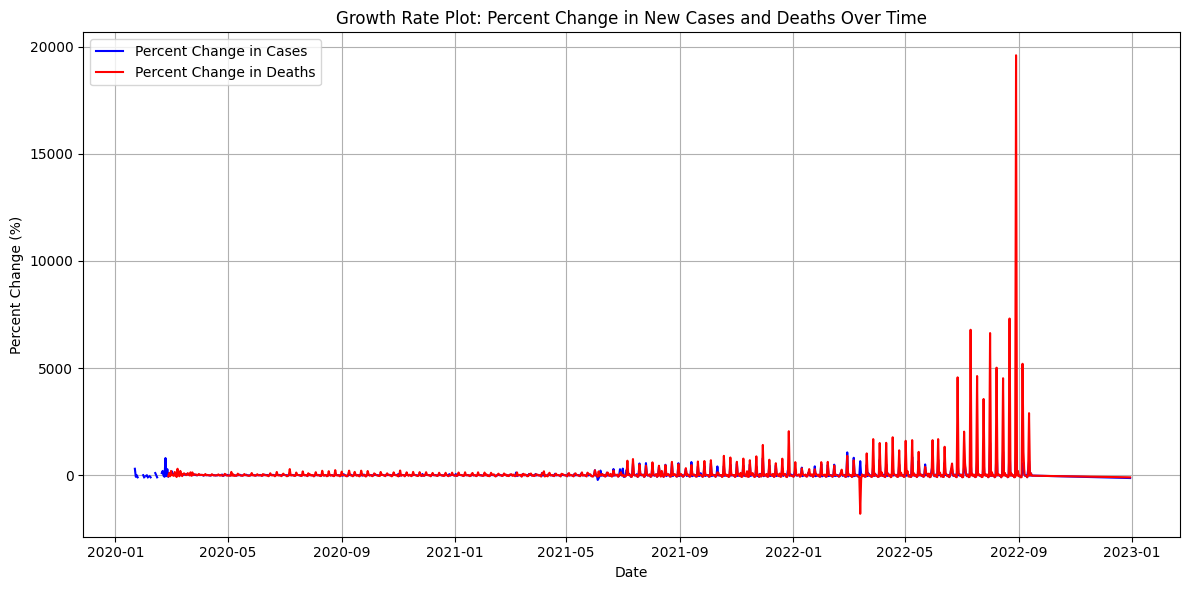

In [14]:
# Calculate percent change in new cases and deaths
df['percent_change_cases'] = df['new_confirmed'].pct_change() * 100
df['percent_change_deaths'] = df['new_deceased'].pct_change() * 100

# Plot the growth rate plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['percent_change_cases'], label='Percent Change in Cases', color='blue')
plt.plot(df['date'], df['percent_change_deaths'], label='Percent Change in Deaths', color='red')
plt.title('Growth Rate Plot: Percent Change in New Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


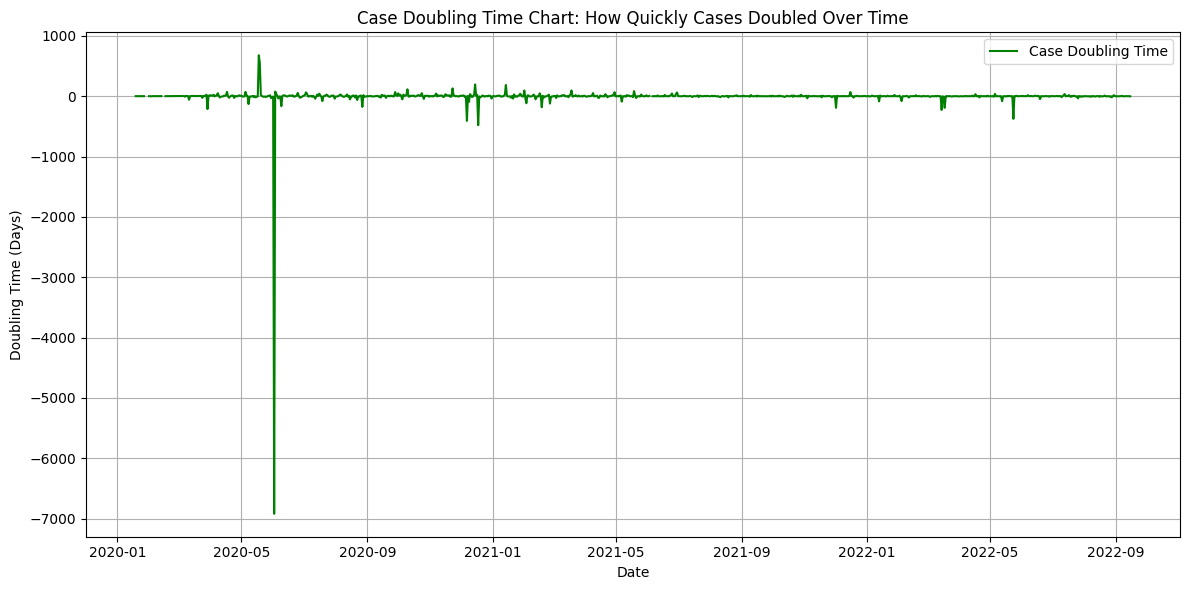

In [15]:
# Calculate case doubling time
df['doubling_time'] = np.log(2) / np.log(1 + df['new_confirmed'].pct_change())

# Plot the case doubling time chart
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['doubling_time'], label='Case Doubling Time', color='green')
plt.title('Case Doubling Time Chart: How Quickly Cases Doubled Over Time')
plt.xlabel('Date')
plt.ylabel('Doubling Time (Days)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

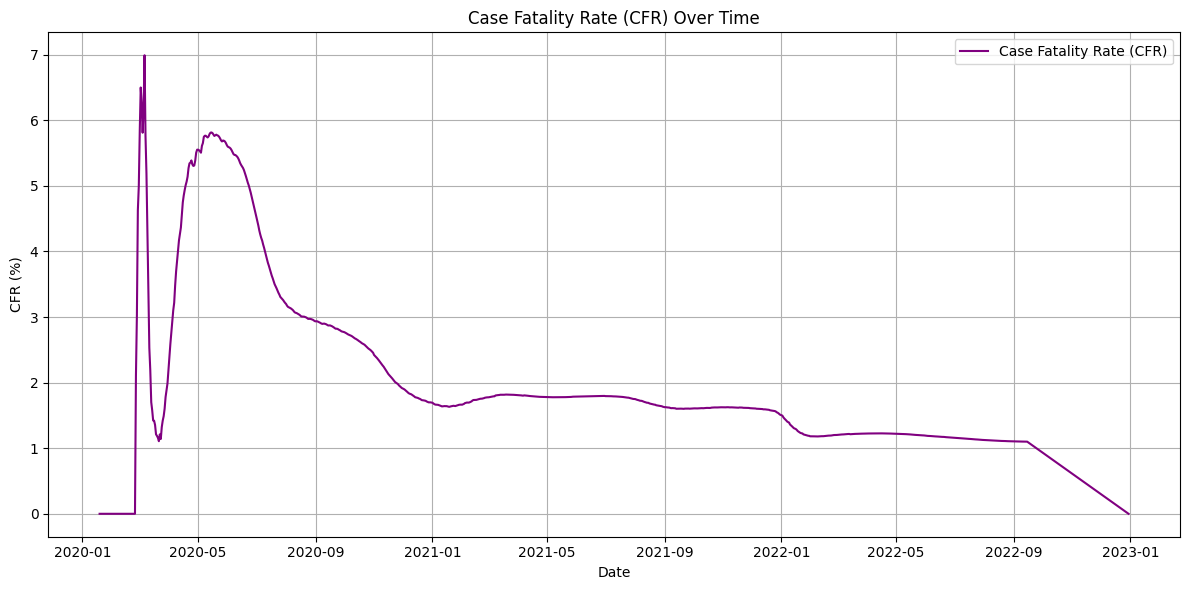

In [16]:
# Calculate Case Fatality Rate (CFR)
df['cfr'] = (df['cumulative_deceased'] / df['cumulative_confirmed']) * 100

# Plot the CFR over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['cfr'], label='Case Fatality Rate (CFR)', color='purple')
plt.title('Case Fatality Rate (CFR) Over Time')
plt.xlabel('Date')
plt.ylabel('CFR (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

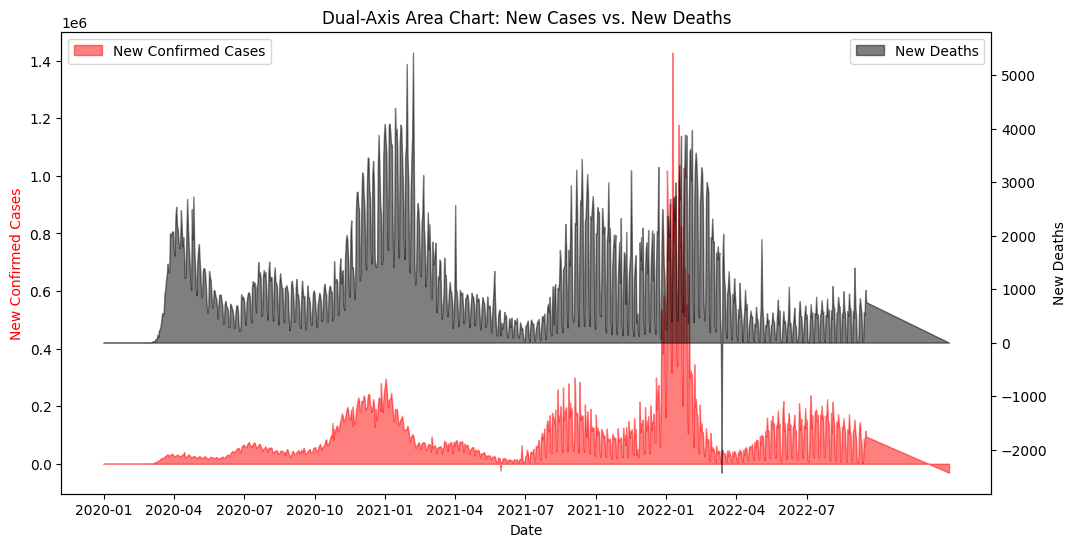

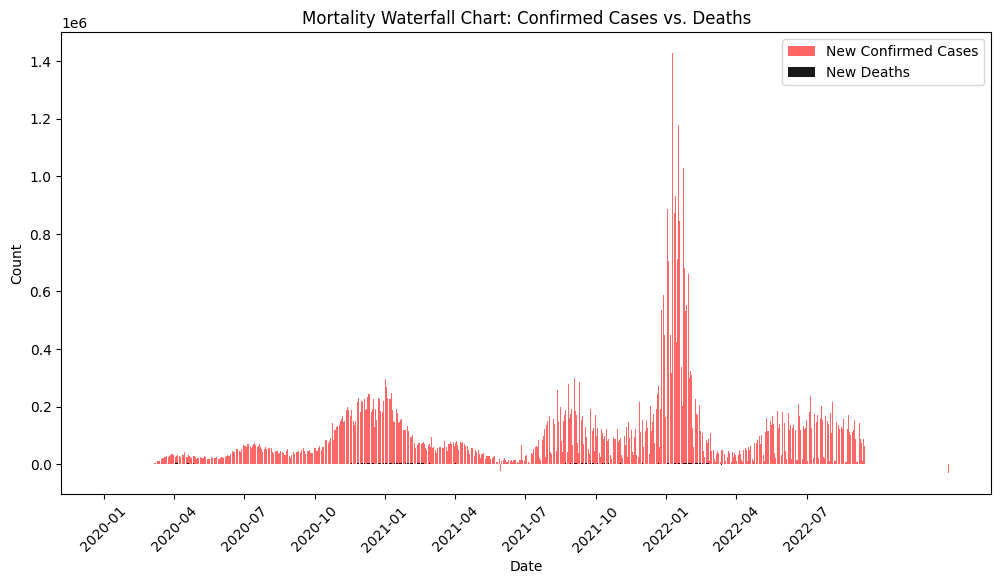

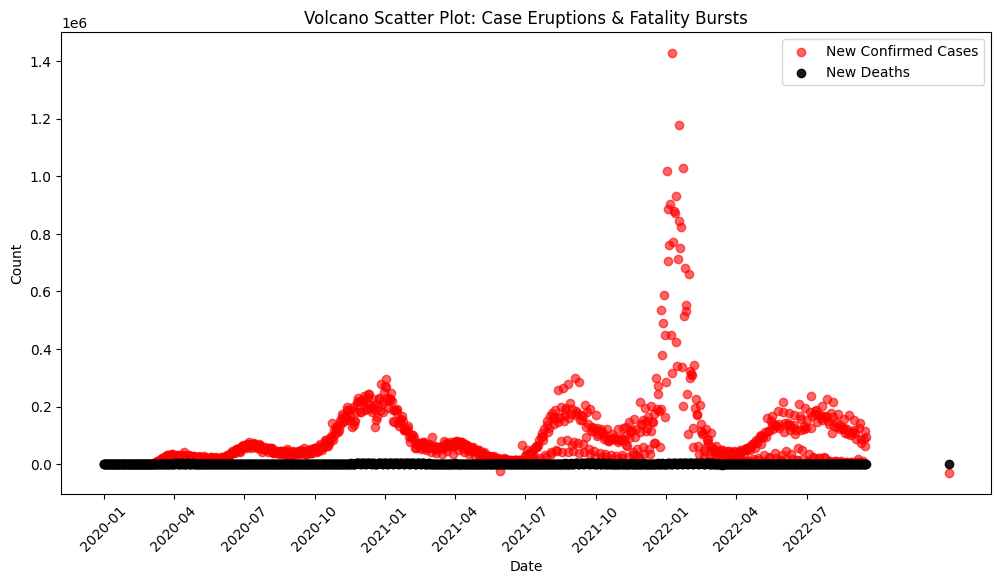

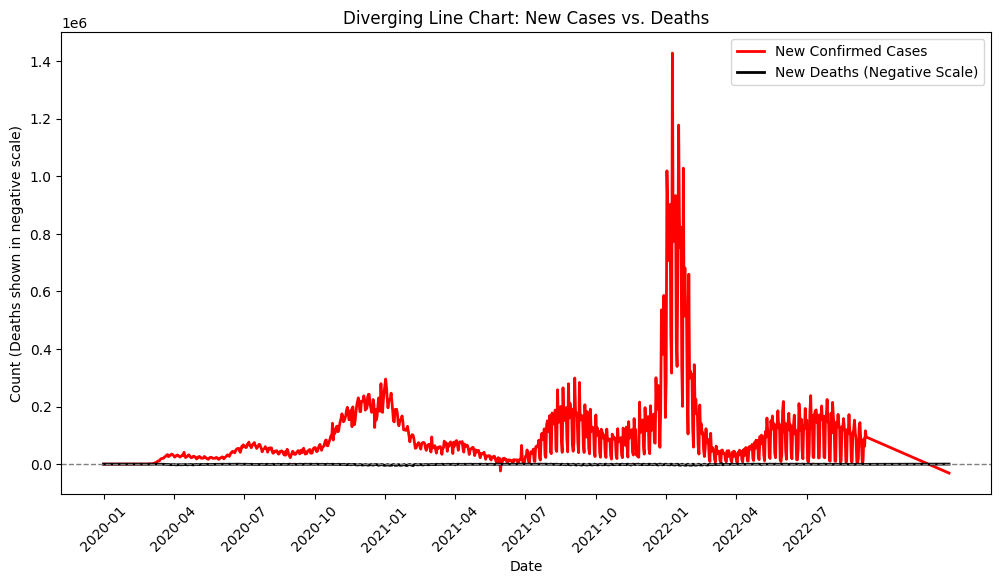

In [17]:
import matplotlib.dates as mdates

# Convert dates to matplotlib's numerical format for plotting
df['date_numeric'] = mdates.date2num(df['date'])

# --- 1. Dual-Axis Area Chart (Confirmed vs. Deaths) ---
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.fill_between(df['date_numeric'], df['new_confirmed'], color='red', alpha=0.5, label='New Confirmed Cases')
ax2.fill_between(df['date_numeric'], df['new_deceased'], color='black', alpha=0.5, label='New Deaths')

ax1.set_xlabel("Date")
ax1.set_ylabel("New Confirmed Cases", color='red')
ax2.set_ylabel("New Deaths", color='black')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.set_xticks(df['date_numeric'][::90])  # Show every 3 months

ax1.set_title("Dual-Axis Area Chart: New Cases vs. New Deaths")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

# --- 2. Mortality Waterfall Plot ---
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(df['date_numeric'], df['new_confirmed'], color='red', alpha=0.6, label="New Confirmed Cases")
ax.bar(df['date_numeric'], df['new_deceased'], color='black', alpha=0.9, label="New Deaths")

ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xticks(df['date_numeric'][::90])

ax.set_title("Mortality Waterfall Chart: Confirmed Cases vs. Deaths")
ax.legend()
plt.xticks(rotation=45)
plt.show()

# --- 3. Volcano Plot (Explosive Growth & Fatality Bursts) ---
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['date_numeric'], df['new_confirmed'], color='red', alpha=0.6, label="New Confirmed Cases")
ax.scatter(df['date_numeric'], df['new_deceased'], color='black', alpha=0.9, label="New Deaths")

ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xticks(df['date_numeric'][::90])

ax.set_title("Volcano Scatter Plot: Case Eruptions & Fatality Bursts")
ax.legend()
plt.xticks(rotation=45)
plt.show()

# --- 4. Diverging Line Chart (New Cases vs. New Deaths) ---
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df['date_numeric'], df['new_confirmed'], color='red', label="New Confirmed Cases", linewidth=2)
ax.plot(df['date_numeric'], -df['new_deceased'], color='black', label="New Deaths (Negative Scale)", linewidth=2)

ax.axhline(0, color='gray', linewidth=1, linestyle="--")
ax.set_xlabel("Date")
ax.set_ylabel("Count (Deaths shown in negative scale)")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xticks(df['date_numeric'][::90])

ax.set_title("Diverging Line Chart: New Cases vs. Deaths")
ax.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset: time periods as keys and values per category (A, B, C)
time_periods = ['2018', '2019', '2020']
categories = ['A', 'B', 'C']
data = {
    '2018': [30, 20, 50],
    '2019': [40, 25, 35],
    '2020': [20, 45, 35]
}

# Define parameters for the rings
inner_radius = 0.2  # starting radius for the innermost ring
ring_width = 0.3    # radial width of each ring

# Color mapping for each category
colors = {'A': 'tab:blue', 'B': 'tab:orange', 'C': 'tab:green'}

# Create a polar subplot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_direction(-1)  # clockwise
ax.set_theta_zero_location("N")  # zero at the top

# Loop through each time period and plot its ring
for i, period in enumerate(time_periods):
    # Determine the radial starting point for this ring
    r_start = inner_radius + i * ring_width
    # Get the values for the current period and compute their total
    values = data[period]
    total = sum(values)
    
    # Initialize the starting angle for the current ring
    theta_start = 0
    for j, value in enumerate(values):
        # Calculate the angular width proportional to the value
        theta_width = (value / total) * 2 * np.pi
        
        # Plot a bar in polar coordinates for this segment
        ax.bar(
            x=theta_start + theta_width/2,  # center angle of the segment
            height=ring_width,              # radial thickness of the ring
            width=theta_width,              # angular width of the segment
            bottom=r_start,                 # starting radius of this ring
            color=colors[categories[j]],
            edgecolor='white',
            align='center'
        )
        
        # Annotate the segment with its value (optional)
        theta_text = theta_start + theta_width/2
        r_text = r_start + ring_width/2
        ax.text(theta_text, r_text, f'{value}', ha='center', va='center', fontsize=10, color='white')
        
        # Update theta_start for the next segment in the ring
        theta_start += theta_width
    
    # Add a label for the time period on the left side of each ring
    ax.text(0, r_start + ring_width/2, period, ha='center', va='center', fontsize=12, fontweight='bold')

# Remove axis details for a clean look
ax.set_axis_off()
plt.title('Static Radial Segmented Bar Chart', fontsize=16, y=1.08)
plt.show()


/var/folders/9c/hvk4sgxx2fbfd730_hcfkj1m0000gn/T/ipykernel_35743/3508288249.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('Set2', len(categories))


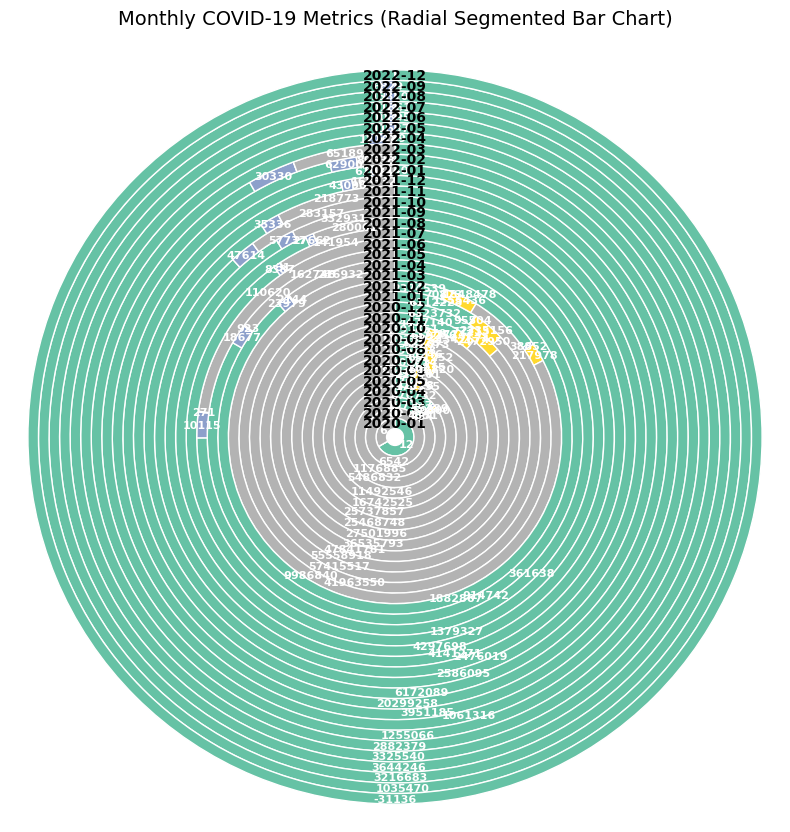

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# 1. READ AND PREPARE THE DATA
# -------------------------------------------------------------------

# Replace 'covid_data.csv' with your actual filename/path.
# Make sure the CSV has columns:
#   date, new_confirmed, new_deceased, new_recovered, new_tested, ...
df = pd.read_csv("/Users/sophiesuo/Downloads/COVID_US_cases.csv", parse_dates=['date'])

# Filter data to the desired date range: 2020-01-13 to 2022-12-31
start_date = pd.to_datetime('2020-01-13')
end_date   = pd.to_datetime('2022-12-31')
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Create a 'year_month' column for monthly grouping
df['year_month'] = df['date'].dt.to_period('M')  # e.g., '2020-01', '2020-02', ...

# Define the four metrics to visualize
categories = ['new_confirmed', 'new_deceased', 'new_recovered', 'new_tested']

# Aggregate sums by month for each category
monthly_sums = (
    df.groupby('year_month')[categories]
      .sum()
      .reset_index()
)

# Convert the Period type to string (e.g., '2020-01') for easier handling
monthly_sums['year_month'] = monthly_sums['year_month'].astype(str)

# Sort by chronological order
monthly_sums = monthly_sums.sort_values(by='year_month')

# Create a dictionary like { '2020-01': [sum_confirmed, sum_deceased, sum_recovered, sum_tested], ... }
data = {}
for _, row in monthly_sums.iterrows():
    ym = row['year_month']  # e.g., '2020-01'
    values = [row[c] for c in categories]
    data[ym] = values

# The sorted list of year-month keys
time_periods = list(data.keys())  # e.g., ['2020-01', '2020-02', ..., '2022-12']

# -------------------------------------------------------------------
# 2. RADIAL SEGMENTED BAR CHART
# -------------------------------------------------------------------

# Define radial layout parameters
inner_radius = 0.2  # how far from center the first ring starts
ring_width   = 0.25 # thickness of each ring

# Create a color mapping for the four categories
# You can customize these colors as you like.
colormap = plt.cm.get_cmap('Set2', len(categories))
colors = {cat: colormap(i) for i, cat in enumerate(categories)}

# Initialize the figure and polar axis
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Make the chart go clockwise and start at the top
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")

# Plot each month (time_period) as a concentric ring
for i, period in enumerate(time_periods):
    # The radius at which this ring starts
    r_start = inner_radius + i * ring_width
    
    # The list of sums for each category in this month
    values = data[period]
    total = sum(values)
    
    theta_start = 0  # start angle for this ring
    for j, value in enumerate(values):
        # If the total is zero for this month, skip to avoid division by zero
        if total == 0:
            theta_width = 0
        else:
            theta_width = (value / total) * 2 * np.pi
        
        # Plot a bar (segment) for this metric
        ax.bar(
            x=theta_start + theta_width/2,  # center angle
            height=ring_width,              # radial thickness
            width=theta_width,              # angular width
            bottom=r_start,                 # radial starting point
            color=colors[categories[j]],
            edgecolor='white'
        )
        
        # Optionally add a numeric label to each segment (comment out if too cluttered)
        if theta_width > 0:
            ax.text(
                theta_start + theta_width/2, 
                r_start + ring_width/2, 
                f"{int(value)}", 
                ha='center', 
                va='center', 
                fontsize=8, 
                color='white', 
                fontweight='bold'
            )
        
        # Move the start angle for the next segment
        theta_start += theta_width
    
    # Label the ring with the year-month (placed at angle=0, i.e. top)
    ax.text(
        0, 
        r_start + ring_width/2, 
        period, 
        ha='center', 
        va='center', 
        fontsize=10, 
        fontweight='bold'
    )

# Remove the polar axes for a cleaner look
ax.set_axis_off()

# Add a title
plt.title("Monthly COVID-19 Metrics (Radial Segmented Bar Chart)", fontsize=14, pad=20)

# Show or save the plot
plt.show()


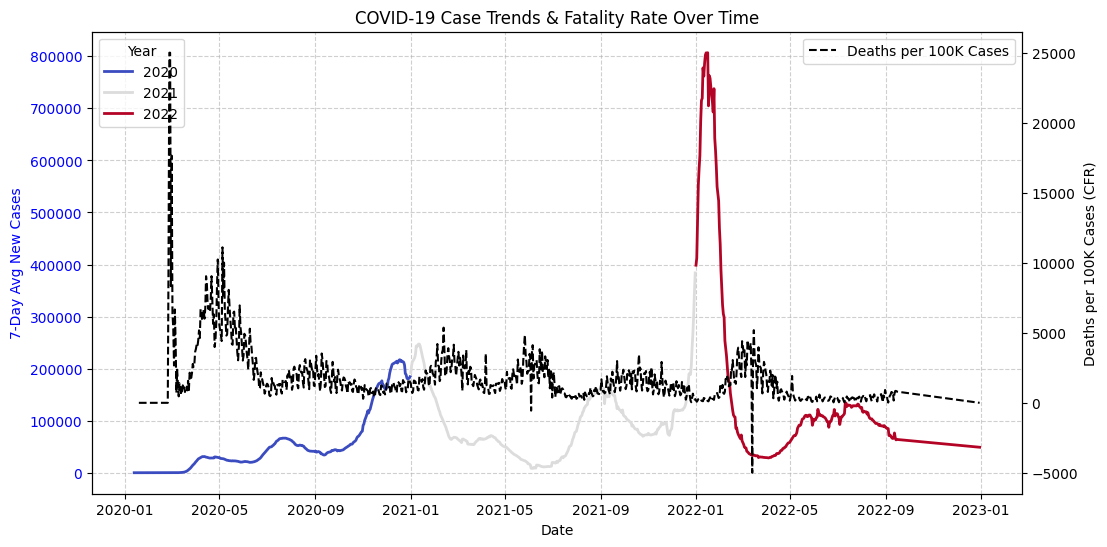

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/Users/sophiesuo/Downloads/COVID_US_cases.csv"
df = pd.read_csv(file_path)

# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.strftime('%b')  # Month as abbreviated name

# Compute 7-day rolling averages for smoothing
df["cases_7day_avg"] = df["new_confirmed"].rolling(window=7, min_periods=1).mean()
df["deaths_7day_avg"] = df["new_deceased"].rolling(window=7, min_periods=1).mean()

# Normalize CFR (Case Fatality Rate) as deaths per 100K cases to compare across time
df["CFR_per_100k"] = (df["new_deceased"] / df["new_confirmed"]) * 100000

# Set up plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot cases with a color gradient by year
sns.lineplot(data=df, x="date", y="cases_7day_avg", hue="year", palette="coolwarm", linewidth=2, ax=ax1)

# Format x-axis for readability
ax1.set_xlabel("Date")
ax1.set_ylabel("7-Day Avg New Cases", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Add a secondary axis for deaths per 100k cases
ax2 = ax1.twinx()
sns.lineplot(data=df, x="date", y="CFR_per_100k", color="black", linestyle="dashed", linewidth=1.5, ax=ax2)
ax2.set_ylabel("Deaths per 100K Cases (CFR)", color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Add title and legend
plt.title("COVID-19 Case Trends & Fatality Rate Over Time")
ax1.legend(title="Year", loc="upper left")
ax2.legend(["Deaths per 100K Cases"], loc="upper right")

# Show gridlines and finalize layout
ax1.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.show()
